## Tic-Tac-Toe Agent


#### Aim :</br>
    To implement a Tic-Tac-Toe using RL using the provided environment file.

#### Import libraries

In [178]:
import pickle
import time
import random
import collections
import numpy as np
from matplotlib import pyplot as plt
from TCGame_Env1 import TicTacToe # from <TC_Env> import <TicTacToe> - importing class from environment file

In [179]:
# A Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x
def Q_state(state):
    return ('-'.join(str(e) for e in state)).replace('nan','x')

#### Epsilon-greedy strategy 

In [180]:
class Qlearning:
    # setting Hyper Parameters here    
    def __init__(self, epsilon=0.3, alpha=0.1, gamma=0.91, values=[]):
        self.epsilon=epsilon
        self.alpha=alpha
        self.gamma=gamma
        self.Q = {} #the Q table
        self.last_board=None
        self.q_last=0.0
        self.state_action_last=None
        self.values = values
        self.options = []

    # Reset 
    def game_begin(self):
        self.last_board = None
        self.q_last = 0.0
        self.state_action_last = None
        self.options = self.values.copy()

    # epsilon greedy strategy
    def epsilon_greedy(self, state, possible_moves): 
        #return the action
        self.last_board = tuple(state)
        if(random.random() < self.epsilon):
            move = random.choice(possible_moves) ##action
            self.state_action_last=(self.last_board,move)
            
            self.q_last=self.getQ(self.last_board,move)
            return move
        else: # greedy strategy
            Q_list=[]
            for action in possible_moves:
                Q_list.append(self.getQ(self.last_board,action))
            maxQ=max(Q_list)

            if Q_list.count(maxQ) > 1:
                # choose randomly from the best options
                best_options = [i for i in range(len(possible_moves)) if Q_list[i] == maxQ]
                i = random.choice(best_options)
            else:
                i = Q_list.index(maxQ)
            self.state_action_last = (self.last_board, possible_moves[i])
            self.q_last = self.getQ(self.last_board, possible_moves[i])
            return possible_moves[i]

    
    def getQ(self, state, action): #get the Q-states
        if(self.Q.get((state,action))) is None:
            self.Q[(state,action)] = 1.0
        return self.Q.get((state,action))

    def updateQ(self, reward, state, possible_moves): # update the Q-states 
        q_list=[]
        for moves in possible_moves:
            q_list.append(self.getQ(tuple(state), moves))
        if q_list:
            max_q_next = max(q_list)
        else:
            max_q_next = 0.0
        self.Q[self.state_action_last] = self.q_last + self.alpha * ((reward + self.gamma*max_q_next) - self.q_last)

    def saveQ(obj,file_name):  #save table
        with open(file_name +'.pkl', 'wb') as f:
            pickle.dump(obj, f, protocol=pickle.HIGHEST_PROTOCOL)
            print(len(obj.keys())) 
    

    def loadQ(self,file_name): # load pickle
        with open(file_name + '.pkl', 'rb') as f:
            self.Q = pickle.load(f)

#### Tracking the state-action pairs for checking convergence

In [181]:
#game instantiation
game = TicTacToe() 

In [182]:
#RL agent
RL_Agent =  Qlearning(values=[1,3,5,7,9]) 

In [183]:
#Environment 
Environment =  Qlearning(values=[2,4,6,8])   

In [184]:
#Training for 5 lakh iterations
game.startTraining(RL_Agent,Environment, 500000, verbose=False) 

Training Started
Training Complete


In [185]:
RL_Agent_Q, Environment_Q = game.getQ()

In [186]:
#Qlearning.saveQ(RL_Agent_Q,"RL_Agent_Policy")

3104481


In [187]:
#Qlearning.saveQ(Environment_Q,"Environment_Policy")

1700852


In [188]:
RL_Agent_Q

{((0, 0, 0, 0, 0, 0, 0, 0, 0), 9): -1.382817211901004,
 ((0, 0, 0, 0, 0, 0, 0, 0, 1), 1): 1.0,
 ((0, 0, 0, 0, 0, 0, 0, 0, 1), 2): 1.0,
 ((0, 0, 0, 0, 0, 0, 0, 0, 1), 3): 1.0,
 ((0, 0, 0, 0, 0, 0, 0, 0, 1), 4): 1.0,
 ((0, 0, 0, 0, 0, 0, 0, 0, 1), 5): 1.0,
 ((0, 0, 0, 0, 0, 0, 0, 0, 1), 6): 1.0,
 ((0, 0, 0, 0, 0, 0, 0, 0, 1), 7): 1.0,
 ((0, 0, 0, 0, 0, 0, 0, 0, 1), 8): 1.0,
 ((6, 0, 0, 0, 0, 0, 0, 0, 1), 7): 0.9041439716830919,
 ((6, 0, 0, 0, 0, 0, 9, 0, 1), 2): 1.0,
 ((6, 0, 0, 0, 0, 0, 9, 0, 1), 3): 1.0,
 ((6, 0, 0, 0, 0, 0, 9, 0, 1), 4): 1.0,
 ((6, 0, 0, 0, 0, 0, 9, 0, 1), 5): 1.0,
 ((6, 0, 0, 0, 0, 0, 9, 0, 1), 6): 1.0,
 ((6, 0, 0, 0, 0, 0, 9, 0, 1), 8): 1.0,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 1): -1.2533946531712201,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 2): -3.008101320008192,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 3): -1.8713039540975611,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 4): -1.2834879512574495,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 5): -1.5483629157003995,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 6): -1.4011550438841

In [189]:
Environment_Q

{((0, 0, 0, 0, 0, 0, 0, 0, 1), 1): -9.089984415607951,
 ((0, 0, 0, 0, 0, 0, 0, 0, 1), 2): -9.089980760009816,
 ((0, 0, 0, 0, 0, 0, 0, 0, 1), 3): -9.089982684008834,
 ((0, 0, 0, 0, 0, 0, 0, 0, 1), 4): -9.089980760009816,
 ((0, 0, 0, 0, 0, 0, 0, 0, 1), 5): -9.089982684008834,
 ((0, 0, 0, 0, 0, 0, 0, 0, 1), 6): -9.089980760009816,
 ((0, 0, 0, 0, 0, 0, 0, 0, 1), 7): -9.089980760009816,
 ((0, 0, 0, 0, 0, 0, 0, 0, 1), 8): -9.089985974047156,
 ((6, 0, 0, 0, 0, 0, 9, 0, 1), 2): 1.0,
 ((6, 0, 0, 0, 0, 0, 9, 0, 1), 3): 1.0,
 ((6, 0, 0, 0, 0, 0, 9, 0, 1), 4): 1.0,
 ((6, 0, 0, 0, 0, 0, 9, 0, 1), 5): 1.0,
 ((6, 0, 0, 0, 0, 0, 9, 0, 1), 6): 1.0,
 ((6, 0, 0, 0, 0, 0, 9, 0, 1), 8): 1.0,
 ((0, 0, 0, 0, 5, 0, 0, 0, 0), 2): -9.089915897343465,
 ((9, 8, 0, 0, 5, 0, 0, 0, 0), 3): 1.0,
 ((9, 8, 0, 0, 5, 0, 0, 0, 0), 4): 5.64341969,
 ((9, 8, 0, 0, 5, 0, 0, 0, 0), 6): 1.0,
 ((9, 8, 0, 0, 5, 0, 0, 0, 0), 7): 1.8181736695860644,
 ((9, 8, 0, 0, 5, 0, 0, 0, 0), 8): 1.991,
 ((9, 8, 0, 0, 5, 0, 0, 0, 0), 9): 1.0,
 

In [190]:
RL_Agent_Q[((0, 0, 0, 0, 0, 0, 0, 0, 0), 1)]

-1.2533946531712201

In [191]:
RL_Agent_Q[((0, 0, 0, 0, 0, 0, 0, 0, 0), 2)]

-3.008101320008192

In [192]:
RL_Agent_Q[((0, 0, 0, 0, 0, 0, 0, 0, 0), 3)]

-1.8713039540975611

In [193]:
RL_Agent_Q[((0, 0, 0, 0, 0, 0, 0, 0, 0), 4)]

-1.2834879512574495

In [194]:
RL_Agent_Q[((0, 0, 0, 0, 0, 0, 0, 0, 0), 5)]

-1.5483629157003995

In [195]:
RL_Agent_Q[((0, 0, 0, 0, 0, 0, 0, 0, 0), 6)]

-1.4011550438841358

In [196]:
RL_Agent_Q[((0, 0, 0, 0, 0, 0, 0, 0, 0), 7)]

-2.5496575304763636

In [197]:
RL_Agent_Q[((0, 0, 0, 0, 0, 0, 0, 0, 0), 8)]

-0.1409811552389838

In [198]:
RL_Agent_Q[((0, 0, 0, 0, 0, 0, 0, 0, 0), 9)]

-1.382817211901004

# Epsilon - decay check

In [199]:
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

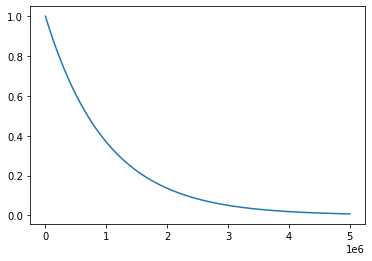

In [200]:
plt.plot(time, epsilon)
plt.show()